## **Exploring Data Science Job Opportunities 🔍🚀**

Your mission is to design a specialized tool that extracts and analyzes data science job listings from a single online source of your choice. Focus on crafting a laser-focused web scraping solution tailored to the chosen platform, ensuring the collection of crucial details such as job titles, company names, experience requirements, salary ranges, and locations.

### **Key Tasks:**

1. **Source Selection:**
Choose a preferred online platform for data science job listings. Platforms like TimesJobs, LinkedIn Jobs, Indeed, Naukri, Glassdoor are potential options. Specify your chosen source in your solution. 🎯
2. **Web Scraping Precision:**
Engineer a targeted web scraping mechanism adept at extracting specific information from the chosen platform. ⚙️
3. **Data Extraction:**
Focus on extracting essential details from job listings, including but not limited to job titles, company names, required experience levels, salary ranges, and locations. 📊
4. **Data Organization:**
Ensure efficient organization and cleaning of the extracted data. The emphasis should be on presenting the information in a clear and understandable format.🧹
5. **Insights Generation:**
Develop tools for analyzing the gathered data to generate insights. Explore patterns related to job titles, experience requirements, salary distributions, and geographic preferences. 🔍
6. **Visualization:**
Create visual representations such as charts and graphs to communicate the insights effectively. Your visuals should provide a user-friendly interpretation of the data. 📈

In [ ]:
# lets automate the process to get minimum 10 pages info
# considering 24 posts on a page I will get 240 job posts
from bs4 import BeautifulSoup as bs
import requests
import pandas as pd

# set a flag for iteration
first_loop = True


for i in range(1, 11):

    # put URL and get response
    url = f"https://www.timesjobs.com/candidate/job-search.html?from=submit&luceneResultSize=25&txtKeywords=0DQT0Data%20Science0DQT0&postWeek=60&searchType=personalizedSearch&actualTxtKeywords=0DQT0Data%20Science0DQT0&searchBy=0&rdoOperator=OR&pDate=I&sequence={i}&startPage=1"
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'}
    response = requests.get(url, headers=headers)
    # get response
    parsed_data = bs(response.text, 'html.parser')

    # find <ul> tags
    main = parsed_data.find_all('ul')

    # find ul tags that have class = "new-joblist" because that class contains all information we need
    for uls in main:
        if uls.get('class'):
            if "new-joblist" in uls.get('class'):
                main_snippet = uls

    # in main snippet which contains information of our jobs find list items with property 'clearfix job-bx wht-shd-bx'
    # the property is in list because .get method creats a list if similar property dounded
    lis = main_snippet.find_all('li')
    jobs = []
    for li in lis:
        if li.get('class'):
            if li.get('class') == ['clearfix', 'job-bx', 'wht-shd-bx']:
                jobs.append(li)

    # now from that job lists differntiate items
    details_of_jobs = []
    for details in jobs:

        # only h2 tag have job title
        title = details.find_all('h2')[0].text.strip()
        # only h2 tag have job title
        recr = details.find_all('h3')[0].text.strip()

        # start this values with none because they have possibly none for that field
        exp, salary, loc = None, None, None
        for x in details.find_all('i'):

            # extract <i> tag text check its text because the text gives emoji description and from that I can identify fields of interest
            if x.get('class') == ['material-icons'] and x.text == 'card_travel':
                # the parent tag is definitely <li> tag thus go to parent tag and extract the text for the given filed
                # same logic for other items
                exp = x.find_parent('li').text.strip()
            if x.get('class') == ['material-icons', 'rupee'] and x.text == '₹':
                salary = x.find_parent('li').text.strip()
            if x.get('class') == ['material-icons'] and x.text == 'location_on':
                loc = x.find_parent('li').text.strip()

        desc, skills = None, None
        # extract <label> tag text check its text because the text gives emoji description and from that I can identify fields of interest
        for y in details.find_all('label'):
            # the parent tag is definitely <li> tag thus go to parent tag and extract the text for the given filed
            # same logic for other items
            if y.text == 'Job Description:':
                desc = y.find_parent('li').text.strip()
            if y.text == 'KeySkills:':
                skills = y.find_parent('li').text.strip()

        since = None
        for z in details.find_all('span'):
            if z.get('class') == ["sim-posted"]:
                since = z.find_parent('li').text.strip()

        # makes a list of all items thus creates a data point.
        details_of_jobs.append([title, recr, exp, salary, loc, desc, skills, since])

    # create a dataframe
    df = pd.DataFrame({"title" : [x[0] for x in details_of_jobs],
                    "recruiter" : [x[1] for x in details_of_jobs],
                    "experinece" : [str(x[2])[11:] for x in details_of_jobs if x],
                    "salary" : [str(x[3]) for x in details_of_jobs if x],
                    "location" : [str(x[4])[12:] for x in details_of_jobs if x],
                    "description" : [str(x[5])[17:] for x in details_of_jobs if x],
                    "skills" : [str(x[6])[12:] for x in details_of_jobs if x],
                    "time_since_posted" : [x[7][-20:] for x in details_of_jobs]})

    # clean the dataframe
    for col in df.columns:
        df[col] = df[col].apply(lambda x: x.replace('\n', '').replace('\r', ''))
    df['recruiter'] = df.recruiter.apply(lambda x : x.replace("(More Jobs)", ""))


    # changes a variable name and set first_loop flag to false
    # Thus every time after first time loop has been excuted the program will go to else and execute .append syntax for dataframe.
    if first_loop:
        df_main = df.copy(deep = True)
        first_loop = False
    else:
        df_main = df_main.append(df, ignore_index = True)
# save df
df_main.to_csv(r"TIMES_JOBS_SCRAP.csv", index = False)


<ipython-input-24-34b45a835b97>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_main = df_main.append(df, ignore_index = True)
<ipython-input-24-34b45a835b97>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_main = df_main.append(df, ignore_index = True)
<ipython-input-24-34b45a835b97>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_main = df_main.append(df, ignore_index = True)
<ipython-input-24-34b45a835b97>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_main = df_main.append(df, ignore_index = True)
<ipython-input-24-34b45a835b97>:101: FutureWarning: The frame.append method is deprecated and will be removed fr

In [ ]:
df_main.head()

,title,recruiter,experinece,salary,location,description,skills,time_since_posted
0,Data Science Internship in Pune,Maxgen Technologies,0 - 1 yrs,₹Rs 1.00 - 2.00 Lacs p.a.,"Pune, Amravati, Aurangabad, Sangli, Satara",Maxgen Technologies pvt ltd offering internshi...,.,estPosted today
1,Data Science,HyreFox Consultants,5 - 8 yrs,None,Chennai,Must have experience in any programming langua...,"data science , data cleaning , dashboards",Posted few days ago
2,Data Science,tcg digital solutions pvt ltd,3 - 5 yrs,None,Kolkata,Education Masters / Bachelors degree in Comput...,"data analytics , functional ...",Posted few days ago
3,Data Science,innefu labs pvt. ltd.,4 - 6 yrs,None,"Delhi, Delhi/NCR",Location : DelhiDescriptions :4-6 YearsUsing m...,"procedures , data collection...",Posted few days ago
4,Data Science,bprise pvt ltd,3 - 6 yrs,None,Mumbai,Develop and plan required analytic projects in...,"hive , algorithms , author...",Posted few days ago


In [ ]:
df_main.shape

(250, 8)

## **From 10 pages of TIMES JOBS website I have extracted 250 jobs of data science.**

### 1. The NAN values are taken as string I will convert them into NaNs.
### 2. experience can be extracted into min and max exp required.

### 3. I can create a map for all locations given.
### 4. A feature can be created that shows whether the job is internship or not.

In [ ]:
 #change the variable name for ease
df = df_main.copy()

In [ ]:
import numpy as np
df['salary'] = df.salary.apply(lambda x : np.nan if x == 'None' else x)

In [ ]:
for col in df.columns:
  df[col] = df[col].apply(lambda x : np.nan if x == 'None' else x)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   title              250 non-null    object
 1   recruiter          250 non-null    object
 2   experinece         250 non-null    object
 3   salary             34 non-null     object
 4   location           250 non-null    object
 5   description        250 non-null    object
 6   skills             250 non-null    object
 7   time_since_posted  250 non-null    object
dtypes: object(8)
memory usage: 15.8+ KB


In [ ]:
import re
re.search("(\d+)\s+\-\s+(\d+)\s+yrs", "5 - 10 yrs").group(1)

'5'

In [ ]:
import re
df['min_exp'] = df.experinece.apply(lambda x : int(re.search("(\d+)\s+\-\s+(\d+)\s+yrs", x).group(1)) if x is not np.nan else x)
df['max_exp'] = df.experinece.apply(lambda x : int(re.search("(\d+)\s+\-\s+(\d+)\s+yrs", x).group(2)) if x is not np.nan else x)
df['min_salary'] = df.salary.apply(lambda x : float(re.search("₹Rs\s+(\d+.\d+)\s+\-\s+(\d+.\d+)\s+Lacs p.a", x).group(1)) if x is not np.nan else x)
df['max_salary'] = df.salary.apply(lambda x : float(re.search("₹Rs\s+(\d+.\d+)\s+\-\s+(\d+.\d+)\s+Lacs p.a", x).group(2)) if x is not np.nan else x)


In [ ]:
df['avg_salary'] = df.apply(lambda x : (x['min_salary'] + x['max_salary'])/2, axis = 1)

In [ ]:
df['intern'] = df.title.apply(lambda x : 1 if 'internship' in x.lower() else 0)

# **VISUALIZATION**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

### **Uni variate**

In [ ]:
plt.style.use('bmh')
plt.rcParams['figure.figsize'] = [16, 7]
plt.rcParams['font.size'] = 10

array([[<Axes: title={'center': 'min_exp'}>,
        <Axes: title={'center': 'max_exp'}>],
       [<Axes: title={'center': 'min_salary'}>,
        <Axes: title={'center': 'max_salary'}>],
       [<Axes: title={'center': 'avg_salary'}>,
        <Axes: title={'center': 'intern'}>]], dtype=object)

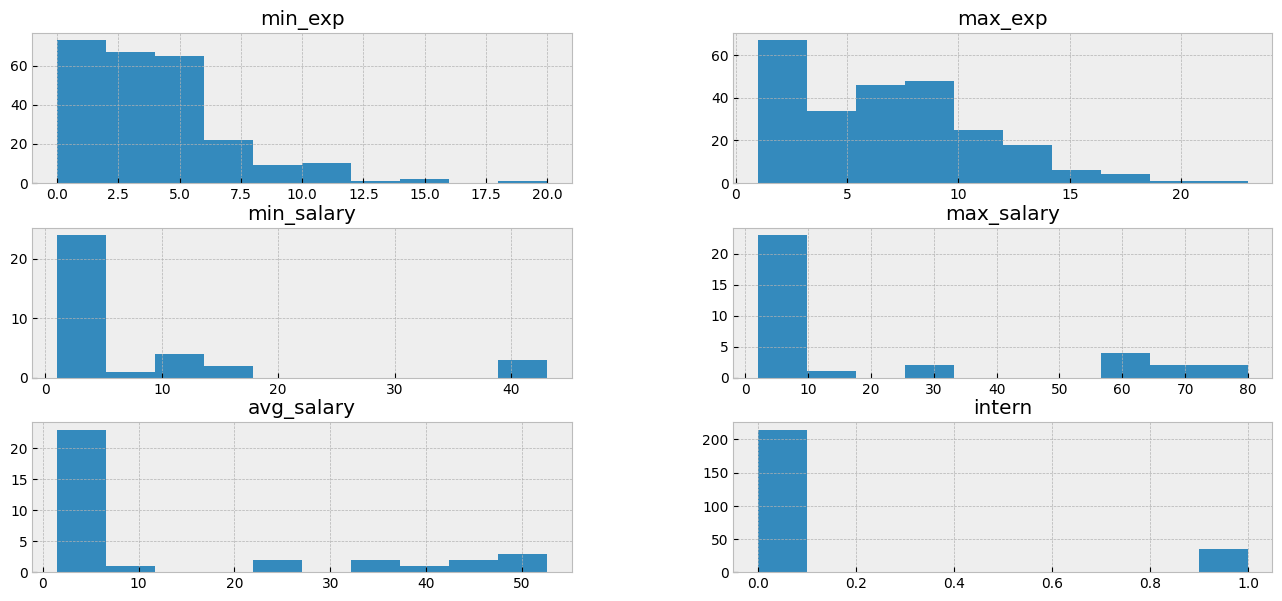

In [ ]:
df_num  = df.select_dtypes(include = ['int', 'float'])
df_num.hist()

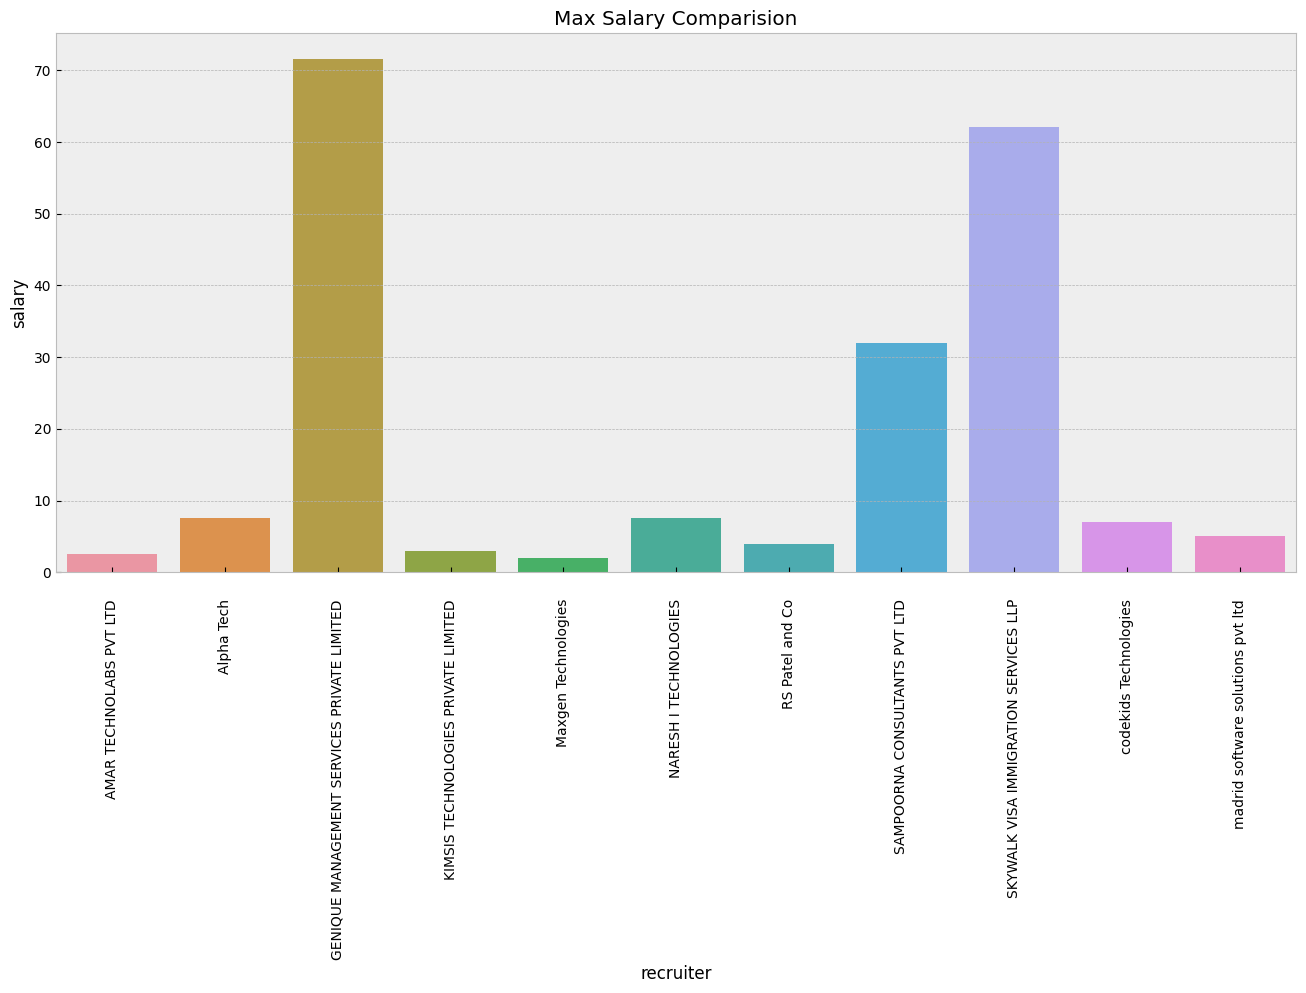

In [ ]:
maxs = df.groupby('recruiter').max_salary.mean().reset_index(name = 'salary')
maxs = maxs[maxs.salary > 0]
sns.barplot(maxs, y = 'salary', x = 'recruiter')
plt.xticks(rotation = 90)
plt.title("Max Salary Comparision")
plt.show()

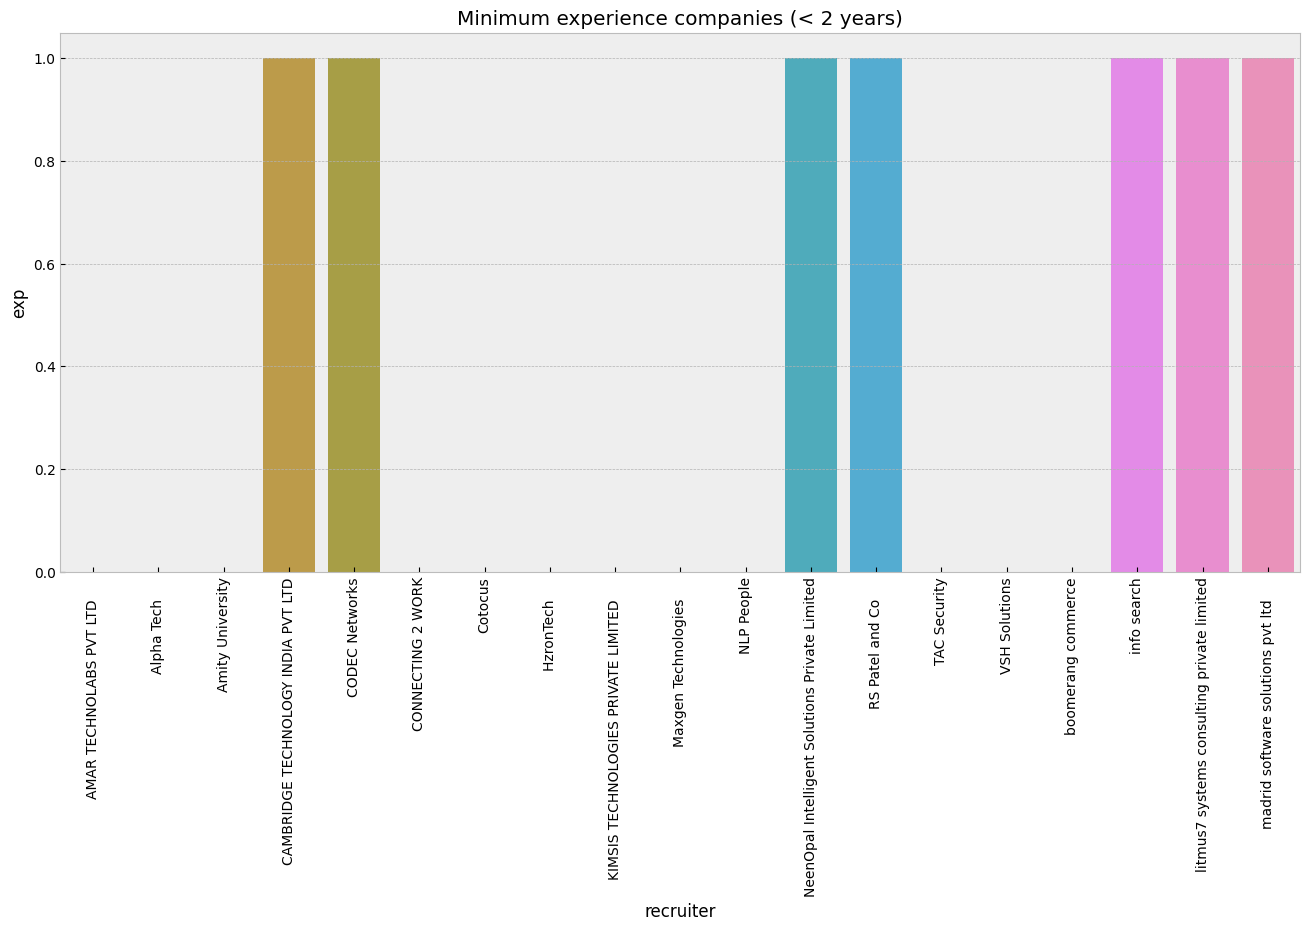

In [ ]:
maxs = df.groupby('recruiter').min_exp.mean().reset_index(name = 'exp')
maxs = maxs[maxs.exp < 2]
sns.barplot(maxs, y = 'exp', x = 'recruiter')
plt.xticks(rotation = 90)
plt.title("Minimum experience companies (< 2 years)")
plt.show()

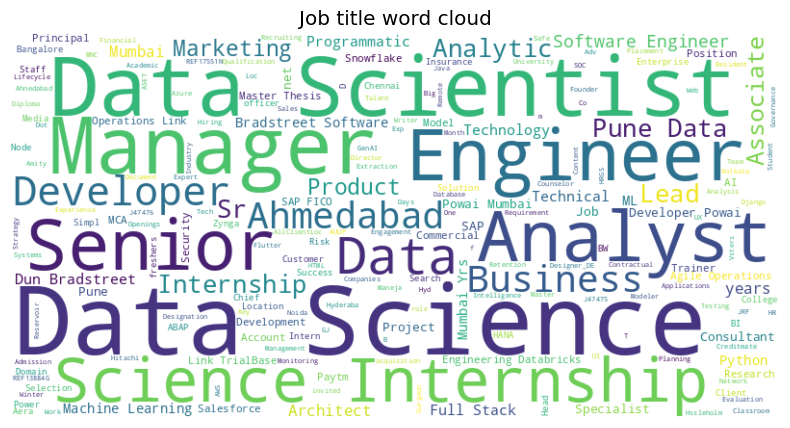

In [ ]:
from wordcloud import WordCloud

text_series = df.title

# Combine all text into a single string
all_text = ' '.join(text_series)

# Generate WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the WordCloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Job title word cloud")
plt.axis('off')
plt.show()

<ipython-input-72-b9486c3111cd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_series[i] = " ".join(x.split(','))


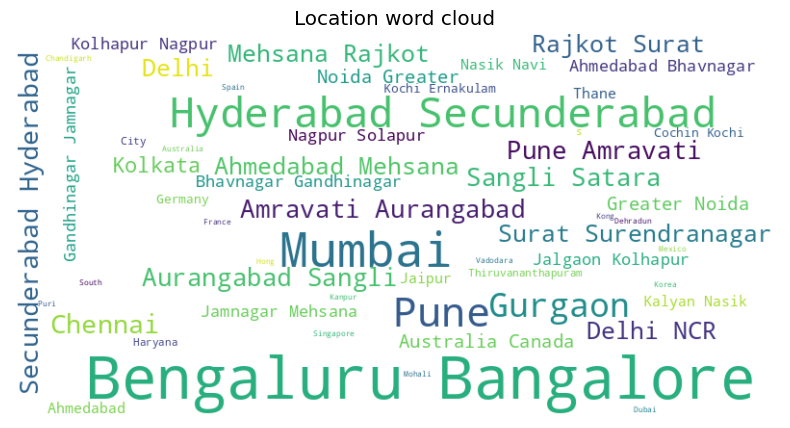

In [ ]:
text_series = df.location

for i, x in enumerate(text_series):
  text_series[i] = " ".join(x.split(','))

# Combine all text into a single string
all_text = ' '.join(text_series)

# Generate WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the WordCloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Location word cloud")
plt.axis('off')
plt.show()

<ipython-input-73-cee60f7c6d96>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_series[i] = " ".join(x.split(','))


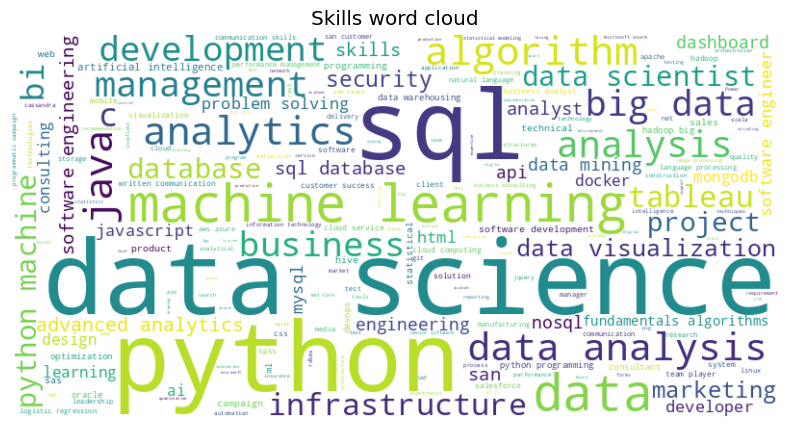

In [ ]:
text_series = df.skills

for i, x in enumerate(text_series):
  text_series[i] = " ".join(x.split(','))

# Combine all text into a single string
all_text = ' '.join(text_series)

# Generate WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the WordCloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Skills word cloud")
plt.axis('off')
plt.show()

## **INSIGHTS**
### 1. Min and Max experience required is right skewed and shows that normal experience required is around 0 to 5 years. Normal Max expereince required is around 5 to 10 years.
### 2. For most of jobs the salary is not discussed / shown.
### 3. Around 20% of the jobs are for internship.
### 4. GENIQUE MANAGEMENT, SKYWALK VISA IMMIGRATION, SAMPOORNA TECH are top package offering companies.
### 5. Around 10 companies are ready to take people with 0 or 1 years experince.
### 6. Senior, Data Scientist, Analyst, Machine learning, Manager, Engineer are the most repeated words in job title.
### 7. Mumbai, Pune, Bangaluru, Bangalore, Hyderabad are most repeated cities for the job.
### 8. SQL, Python, machine learning, analytics are most demanded skills.

## **CONCLUSION**
#### In conclusion, the web scraping project targeting data science job details on the ***Times Jobs*** website has been successfully executed. The project involved scraping relevant information, cleaning and preprocessing the data, and conducting exploratory data analysis to derive insights into job trends. The analysis revealed valuable information about popular job titles, in-demand skills, and cities of job opportunities. Despite encountering challenges like website changes, the project provides a foundation for future work, including the possibility of incorporating machine learning for sentiment analysis and predictive modeling. The insights obtained contribute to a better understanding of the current data science job market, benefiting job seekers, employers, and policymakers.